In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
!pip install scikit-learn --upgrade --quiet
!pip install pyod --upgrade --quiet

# Data Preprocessing: Outliers and Missing Values

In [2]:
from sklearn import datasets
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Outliers Detection

We will use the **LOF method** to make a percentage of examples as outliers of the Iris dataset.
This method computes an outlierness factor and marks the percentage of examples with higher value

You can play with the number of neighbors used to compute LOF


In [3]:
@interact(NEIGHBORS = (3, 15, 2), OUTLIERS = (0.1, 0.4))
def g(NEIGHBORS=3, OUTLIERS=0.1):
    iris = datasets.load_iris()
    lof = LocalOutlierFactor(n_neighbors=NEIGHBORS, contamination=OUTLIERS)
    labels = lof.fit_predict(iris['data'])
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels,s=100)
    plt.title('Outliers/Inliers')
    plt.subplot(1,2,2)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lof.negative_outlier_factor_,s=100)
    plt.title('LOF')

interactive(children=(IntSlider(value=3, description='NEIGHBORS', max=15, min=3, step=2), FloatSlider(value=0.…

This is an outlier detector based on **K-nearest neighbors**

In [4]:
@interact(NEIGHBORS = (3, 15, 2), OUTLIERS = (0.1, 0.4))
def g(NEIGHBORS=3, OUTLIERS=0.1):
    iris = datasets.load_iris()
    knnout = KNN(n_neighbors=NEIGHBORS, contamination=OUTLIERS)
    labels = 1 - knnout.fit_predict(iris['data'])
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels,s=100)
    plt.title('Outliers/Inliers')
    plt.subplot(1,2,2)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=1-knnout.decision_scores_,s=100)
    plt.title('KNN')

interactive(children=(IntSlider(value=3, description='NEIGHBORS', max=15, min=3, step=2), FloatSlider(value=0.…

This is an **angle based** outlier detection method

In [5]:
@interact(NEIGHBORS = (3, 15, 2), OUTLIERS = (0.1, 0.4))
def g(NEIGHBORS=3, OUTLIERS=0.1):
    iris = datasets.load_iris()
    about = ABOD(n_neighbors=NEIGHBORS, contamination=OUTLIERS)
    labels = 1 - about.fit_predict(iris['data'])
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels,s=100)
    plt.title('Outliers/Inliers')
    plt.subplot(1,2,2)
    plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=about.decision_scores_,s=100)
    plt.title('Angle Based')

interactive(children=(IntSlider(value=3, description='NEIGHBORS', max=15, min=3, step=2), FloatSlider(value=0.…

## Missing Value Imputation

We obtain a corrupted copy of the iris dataset by adding some missing values (exactly 75 missing values distributed on the four dimensions)

The graphic shows the original data marking in yellow the examples that are going to be corrupted.

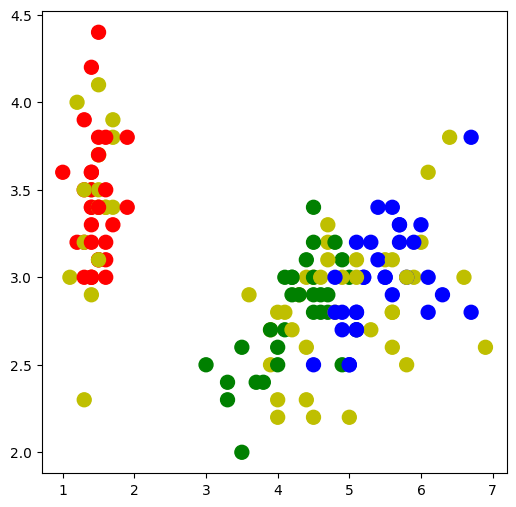

In [6]:
from sklearn.impute import SimpleImputer
from numpy.random import randint

iris = datasets.load_iris()
dimX, dimY = iris['data'].shape
lrandX = randint(dimX, size=75)
lrandY = randint(dimY, size=75)
lcols = [['r','g','b'][i]  for i in iris['target']]
for i in lrandX:
    lcols[i] = 'y'
fig = plt.figure(figsize=(6,6))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lcols,s=100);

This is a kernel density estimation of the distribution of the values for dimension 1 for the original data (no missing values)

In [7]:
orig = datasets.load_iris()['data']
@interact(vshow = (0,3))
def g(vshow=0):
    fig = plt.figure(figsize=(6,6))
    sns.distplot(orig[:,vshow], hist=False, rug=True, color="g", kde_kws={"shade": True})
    plt.show()

interactive(children=(IntSlider(value=0, description='vshow', max=3), Output()), _dom_classes=('widget-interac…

Now we corrupt the data an we apply a missing values imputer algorithm to complete the data, in this case we substitute the missings using the mean of the attibute.

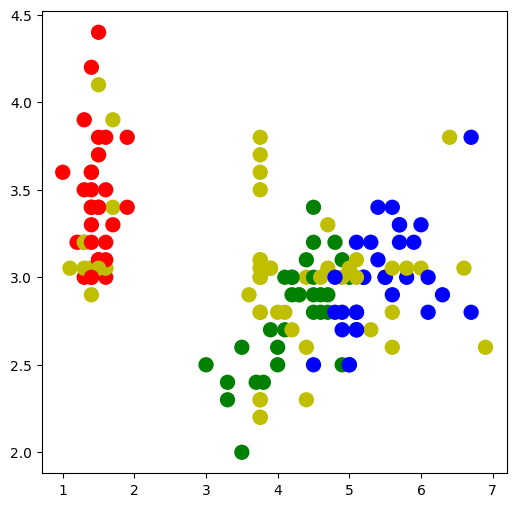

In [8]:
for x,y in zip(lrandX,lrandY):
    iris['data'][x,y]=float('NaN')
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_iris1 = imp.fit_transform(iris['data'])
fig = plt.figure(figsize=(6,6))
plt.scatter(imp_iris1[:, 2], imp_iris1[:, 1], c=lcols,s=100);

As we can see, all the examples with missing values for the dimensions 1 and 2 appear aligned on the mean of the attributes. It can be seen that the distribution of the dimension 1 has changed, the variance has been reduced.

In [9]:
@interact(vshow = (0,3))
def g(vshow=0):
    fig = plt.figure(figsize=(6,6))
    sns.distplot(orig[:,vshow], hist=False, rug=True, color="r", kde_kws={"shade": True})
    sns.distplot(imp_iris1[:,vshow], hist=False, rug=True, color="g", kde_kws={"shade": True})

interactive(children=(IntSlider(value=0, description='vshow', max=3), Output()), _dom_classes=('widget-interac…

Now we use the most frequent value of the attribute to impute the missing values

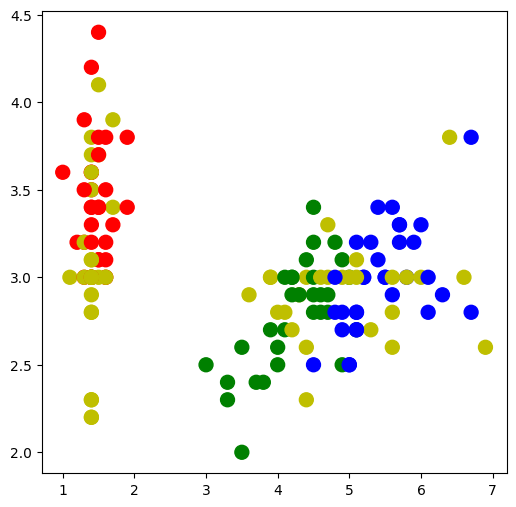

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_iris2 = imp.fit_transform(iris['data'])
fig = plt.figure(figsize=(6,6))
plt.scatter(imp_iris2[:, 2], imp_iris2[:, 1], c=lcols,s=100);

As expected, the imputed examples now appear aligned on the most frequent value and the variance is also reduced

In [11]:
@interact(vshow = (0,3))
def g(vshow=0):
    fig = plt.figure(figsize=(6,6))
    sns.distplot(orig[:,vshow], hist=False, rug=True, color="r", kde_kws={"shade": True})
    sns.distplot(imp_iris2[:,vshow], hist=False, rug=True, color="g", kde_kws={"shade": True})

interactive(children=(IntSlider(value=0, description='vshow', max=3), Output()), _dom_classes=('widget-interac…

Now we are going to use  the euclidean distance to determine the closest examples and to use the mean of the values of the 3-nearest neighbor to substitute the missing value

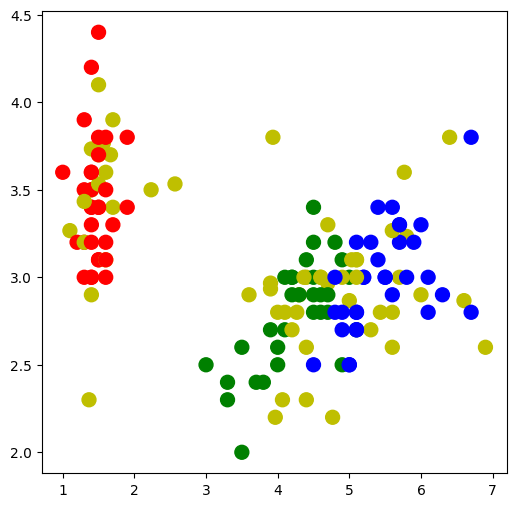

In [12]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(missing_values=np.nan, n_neighbors=3)
imp_iris3 = knnimp.fit_transform(iris['data'])
fig = plt.figure(figsize=(6,6))
plt.scatter(imp_iris3[:, 2], imp_iris3[:, 1], c=lcols,s=100);

As we can see the examples look more naturally distributed and now the distribution of the attributes looks more similar to the original one.

In [13]:
@interact(vshow = (0,3))
def g(vshow=0):
    fig = plt.figure(figsize=(6,6))
    sns.distplot(orig[:,vshow], hist=False, rug=True, color="r", kde_kws={"shade": True})
    sns.distplot(imp_iris3[:,vshow], hist=False, rug=True, color="g", kde_kws={"shade": True})

interactive(children=(IntSlider(value=0, description='vshow', max=3), Output()), _dom_classes=('widget-interac…